In [2]:
%pylab inline
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score

import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [3]:
# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

In [4]:
root_dir = os.path.abspath('.')
data_dir = os.path.join(root_dir, 'data')
sub_dir = os.path.join(root_dir, 'sub')
# check for existence
os.path.exists(root_dir)
os.path.exists(data_dir)
os.path.exists(sub_dir)

True

In [5]:
train = pd.read_csv(os.path.join(data_dir, 'Train', 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'Test.csv'))

sample_submission = pd.read_csv(os.path.join(data_dir, 'Sample_Submission.csv'))

train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


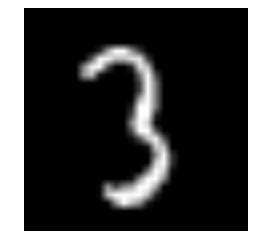

In [6]:
img_name = rng.choice(train.filename)
filepath = os.path.join(data_dir, 'Train', 'Images', 'train', img_name)

img = imread(filepath, flatten=True)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [7]:
# Store images as numpy arrays
temp = []
for img_name in train.filename:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'train', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

train_x /= 255.0
train_x = train_x.reshape(-1, 784).astype('float32')

temp = []
for img_name in test.filename:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'test', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

test_x /= 255.0
test_x = test_x.reshape(-1, 784).astype('float32')

In [8]:
# One hot encoding to convert values to categories
train_y = keras.utils.np_utils.to_categorical(train.label.values)

### Split training data into training and validation

In [9]:
# 70% split into training, 30% split into validation
split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

In [10]:
train.label.ix[split_size:]

34300    3
34301    1
34302    6
34303    8
34304    3
34305    8
34306    8
34307    9
34308    3
34309    8
34310    4
34311    6
34312    6
34313    3
34314    6
34315    7
34316    5
34317    3
34318    0
34319    3
34320    9
34321    3
34322    8
34323    8
34324    7
34325    4
34326    3
34327    8
34328    6
34329    5
        ..
48970    7
48971    5
48972    0
48973    1
48974    4
48975    1
48976    7
48977    5
48978    6
48979    5
48980    6
48981    3
48982    5
48983    5
48984    9
48985    2
48986    9
48987    0
48988    0
48989    7
48990    0
48991    1
48992    1
48993    6
48994    9
48995    2
48996    4
48997    9
48998    3
48999    0
Name: label, dtype: int64

### Set up training model

In [22]:
# 3 layers: Input, Hidden, Output
# Input : 28 * 28 
# Output : 10 * 1 classes
# 50 hidden neurons
# Adam as our optimization algorithms, which is an efficient variant of Gradient Descent algorithm

# define vars
input_num_units = 784
hidden_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128

# create model
model = Sequential([
  Dense(units=hidden_num_units, input_dim=input_num_units, activation='relu'),
  Dense(units=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

# compile the model with necessary attributes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
trained_model = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Train on 34300 samples, validate on 14700 samples
Epoch 1/5
34300/34300 [==============================] - 1s - loss: 0.5661 - acc: 0.8473 - val_loss: 0.3135 - val_acc: 0.9115
Epoch 2/5
34300/34300 [==============================] - 1s - loss: 0.2592 - acc: 0.9263 - val_loss: 0.2512 - val_acc: 0.9301
Epoch 3/5
34300/34300 [==============================] - 1s - loss: 0.2108 - acc: 0.9403 - val_loss: 0.2188 - val_acc: 0.9390
Epoch 4/5
34300/34300 [==============================] - 1s - loss: 0.1807 - acc: 0.9481 - val_loss: 0.2014 - val_acc: 0.9428
Epoch 5/5
34300/34300 [==============================] - 1s - loss: 0.1596 - acc: 0.9545 - val_loss: 0.1862 - val_acc: 0.9470


### Evaluate model

20672/21000 [============================>.] - ETA: 0sPrediction is:  9


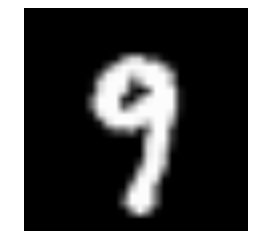

In [14]:
pred = model.predict_classes(test_x)

img_name = rng.choice(test.filename)
filepath = os.path.join(data_dir, 'Train', 'Images', 'test', img_name)

img = imread(filepath, flatten=True)

test_index = int(img_name.split('.')[0]) - train.shape[0]

print("Prediction is: ", pred[test_index])

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [ ]:
'''
Some important parameters to look out for while optimizing neural networks are:

Type of architecture
Number of Layers
Number of Neurons in a layer
Regularization parameters
Learning Rate
Type of optimization / backpropagation technique to use
Dropout rate
Weight sharing
'''

### Train a wide model instead, more hidden neurons

In [31]:
# 3 layers: Input, Hidden, Output
# Input : 28 * 28 
# Output : 10 * 1 classes
# 500 hidden neurons
# Adam as our optimization algorithms, which is an efficient variant of Gradient Descent algorithm

# define vars
input_num_units = 784
hidden_num_units = 500
output_num_units = 10

epochs = 5
batch_size = 128

# create model
model = Sequential([
  Dense(units=hidden_num_units, input_dim=input_num_units, activation='relu'),
  Dense(units=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

# compile the model with necessary attributes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
trained_model = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Train on 34300 samples, validate on 14700 samples
Epoch 1/5
34300/34300 [==============================] - 5s - loss: 0.3375 - acc: 0.9063 - val_loss: 0.1938 - val_acc: 0.9462
Epoch 2/5
34300/34300 [==============================] - 4s - loss: 0.1470 - acc: 0.9576 - val_loss: 0.1403 - val_acc: 0.9598
Epoch 3/5
34300/34300 [==============================] - 4s - loss: 0.0968 - acc: 0.9729 - val_loss: 0.1175 - val_acc: 0.9646
Epoch 4/5
34300/34300 [==============================] - 4s - loss: 0.0698 - acc: 0.9797 - val_loss: 0.1010 - val_acc: 0.9692
Epoch 5/5
34300/34300 [==============================] - 4s - loss: 0.0507 - acc: 0.9853 - val_loss: 0.0942 - val_acc: 0.9713


### Train more hidden layers instead

In [33]:
# 7 layers: Input, Hidden * 5, Output
# Input : 28 * 28 
# Output : 10 * 1 classes
# 50 hidden neurons
# Adam as our optimization algorithms, which is an efficient variant of Gradient Descent algorithm

# define vars
input_num_units = 784
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128

model = Sequential([
 Dense(units=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dense(units=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dense(units=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dense(units=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dense(units=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
 Dense(units=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

# compile the model with necessary attributes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
# Overfitted model
trained_model = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Train on 34300 samples, validate on 14700 samples
Epoch 1/5
34300/34300 [==============================] - 2s - loss: 0.5938 - acc: 0.8188 - val_loss: 0.2619 - val_acc: 0.9223
Epoch 2/5
34300/34300 [==============================] - 1s - loss: 0.2120 - acc: 0.9377 - val_loss: 0.2020 - val_acc: 0.9402
Epoch 3/5
34300/34300 [==============================] - 1s - loss: 0.1592 - acc: 0.9527 - val_loss: 0.1746 - val_acc: 0.9466
Epoch 4/5
34300/34300 [==============================] - 1s - loss: 0.1271 - acc: 0.9614 - val_loss: 0.1903 - val_acc: 0.9436
Epoch 5/5
34300/34300 [==============================] - 1s - loss: 0.1062 - acc: 0.9674 - val_loss: 0.1486 - val_acc: 0.9541


### Introduce Dropout layer to reduce overfitting

In [34]:
# 7 layers: Input, Hidden * 5, Output
# Input : 28 * 28 
# Output : 10 * 1 classes
# 50 hidden neurons
# Adam as our optimization algorithms, which is an efficient variant of Gradient Descent algorithm

# define vars
input_num_units = 784
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128

dropout_ratio = 0.2

model = Sequential([
 Dense(units=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(units=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(units=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(units=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(units=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(units=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

# compile the model with necessary attributes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
trained_model = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Train on 34300 samples, validate on 14700 samples
Epoch 1/5
34300/34300 [==============================] - 3s - loss: 1.1866 - acc: 0.5913 - val_loss: 0.3904 - val_acc: 0.8950
Epoch 2/5
34300/34300 [==============================] - 2s - loss: 0.4963 - acc: 0.8579 - val_loss: 0.2807 - val_acc: 0.9252
Epoch 3/5
34300/34300 [==============================] - 2s - loss: 0.3802 - acc: 0.8980 - val_loss: 0.2452 - val_acc: 0.9339
Epoch 4/5
34300/34300 [==============================] - 2s - loss: 0.3249 - acc: 0.9164 - val_loss: 0.2102 - val_acc: 0.9428
Epoch 5/5
34300/34300 [==============================] - 2s - loss: 0.2930 - acc: 0.9224 - val_loss: 0.1998 - val_acc: 0.9459


### Increase number of epochs

In [36]:
# 7 layers: Input, Hidden * 5, Output
# Input : 28 * 28 
# Output : 10 * 1 classes
# 50 hidden neurons
# Adam as our optimization algorithms, which is an efficient variant of Gradient Descent algorithm

# define vars
input_num_units = 784
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50
output_num_units = 10

epochs = 50
batch_size = 128

dropout_ratio = 0.2

model = Sequential([
 Dense(units=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(units=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(units=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(units=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(units=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(units=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

# compile the model with necessary attributes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
trained_model = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Train on 34300 samples, validate on 14700 samples
Epoch 1/50
34300/34300 [==============================] - 3s - loss: 1.1448 - acc: 0.6056 - val_loss: 0.4032 - val_acc: 0.8867
Epoch 2/50
34300/34300 [==============================] - 2s - loss: 0.4844 - acc: 0.8636 - val_loss: 0.2850 - val_acc: 0.9222
Epoch 3/50
34300/34300 [==============================] - 2s - loss: 0.3703 - acc: 0.9000 - val_loss: 0.2349 - val_acc: 0.9368
Epoch 4/50
34300/34300 [==============================] - 2s - loss: 0.3191 - acc: 0.9173 - val_loss: 0.2222 - val_acc: 0.9401
Epoch 5/50
34300/34300 [==============================] - 2s - loss: 0.2862 - acc: 0.9248 - val_loss: 0.2062 - val_acc: 0.9450
Epoch 6/50
34300/34300 [==============================] - 2s - loss: 0.2679 - acc: 0.9317 - val_loss: 0.1979 - val_acc: 0.9488
Epoch 7/50
34300/34300 [==============================] - 2s - loss: 0.2505 - acc: 0.9345 - val_loss: 0.1837 - val_acc: 0.9518
Epoch 8/50
34300/34300 [==============================] - 2s 

### Wide and deep network

In [38]:
# 7 layers: Input, Hidden * 5, Output
# Input : 28 * 28 
# Output : 10 * 1 classes
# 500 hidden neurons
# Adam as our optimization algorithms, which is an efficient variant of Gradient Descent algorithm

# define vars
input_num_units = 784
hidden1_num_units = 500
hidden2_num_units = 500
hidden3_num_units = 500
hidden4_num_units = 500
hidden5_num_units = 500
output_num_units = 10

epochs = 25
batch_size = 128

dropout_ratio = 0.2

model = Sequential([
 Dense(units=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(units=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(units=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(units=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(units=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(units=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

# compile the model with necessary attributes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
trained_model = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Train on 34300 samples, validate on 14700 samples
Epoch 1/25
34300/34300 [==============================] - 18s - loss: 0.3876 - acc: 0.8789 - val_loss: 0.1568 - val_acc: 0.9535
Epoch 2/25
34300/34300 [==============================] - 16s - loss: 0.1545 - acc: 0.9552 - val_loss: 0.1390 - val_acc: 0.9571
Epoch 3/25
34300/34300 [==============================] - 15s - loss: 0.1155 - acc: 0.9650 - val_loss: 0.1071 - val_acc: 0.9683
Epoch 4/25
34300/34300 [==============================] - 16s - loss: 0.0934 - acc: 0.9734 - val_loss: 0.1081 - val_acc: 0.9700
Epoch 5/25
34300/34300 [==============================] - 16s - loss: 0.0796 - acc: 0.9768 - val_loss: 0.0941 - val_acc: 0.9744
Epoch 6/25
34300/34300 [==============================] - 16s - loss: 0.0654 - acc: 0.9803 - val_loss: 0.1067 - val_acc: 0.9737
Epoch 7/25
34300/34300 [==============================] - 17s - loss: 0.0607 - acc: 0.9818 - val_loss: 0.1102 - val_acc: 0.9709
Epoch 8/25
34300/34300 [==============================

### Use CNN instead of MLP

In [13]:
# reshape data

train_x_temp = train_x.reshape(-1, 28, 28, 1)
val_x_temp = val_x.reshape(-1, 28, 28, 1)

# define vars
input_shape = (784,)
input_reshape = (28, 28, 1)

conv_num_filters = 5
conv_filter_size = 5

pool_size = (2, 2)

hidden_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128

model = Sequential([
 InputLayer(input_shape=input_reshape),

 Convolution2D(25, (5, 5), activation='relu'),
 MaxPooling2D(pool_size=pool_size),

 Convolution2D(25, (5, 5), activation='relu'),
 MaxPooling2D(pool_size=pool_size),

 Convolution2D(25, (4, 4), activation='relu'),
 Flatten(),

 Dense(units=hidden_num_units, activation='relu'),
 Dense(units=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
trained_model_conv = model.fit(train_x_temp, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x_temp, val_y))

Train on 34300 samples, validate on 14700 samples
Epoch 1/5
34300/34300 [==============================] - 32s - loss: 0.2123 - acc: 0.9351 - val_loss: 0.1331 - val_acc: 0.9613
Epoch 2/5
34300/34300 [==============================] - 31s - loss: 0.1044 - acc: 0.9687 - val_loss: 0.1075 - val_acc: 0.9669
Epoch 3/5
34300/34300 [==============================] - 38s - loss: 0.0782 - acc: 0.9749 - val_loss: 0.0741 - val_acc: 0.9775
Epoch 4/5
34300/34300 [==============================] - 37s - loss: 0.0600 - acc: 0.9809 - val_loss: 0.0650 - val_acc: 0.9823
Epoch 5/5
34300/34300 [==============================] - 38s - loss: 0.0524 - acc: 0.9842 - val_loss: 0.0688 - val_acc: 0.9797


In [20]:
test_x_temp = test_x.reshape(-1, 28, 28, 1)
pred = model.predict_classes(test_x_temp)
sample_submission.filename = test.filename; sample_submission.label = pred
sample_submission.to_csv(os.path.join(sub_dir, 'sub.csv'), index=False)

20896/21000 [============================>.] - ETA: 0s